In [0]:
import numpy as np 
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename));

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,Input,concatenate, AveragePooling2D
from keras.optimizers import SGD
from keras import utils
from keras.datasets import cifar10

Using TensorFlow backend.


In [5]:
(trainX,trainY),(testX,testY) = cifar10.load_data();

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
train_images = trainX;
test_images = testX;
train_labels = trainY;
test_labels = testY;

In [0]:
trainX = trainX / 255.0;
testX = testX / 255.0;
trainY = utils.to_categorical(trainY);
testY = utils.to_categorical(testY);

In [0]:
input_img = Input(shape = (32, 32, 3));

In [0]:
#stem
tower_1 = Conv2D(filters = 32, kernel_size = (3,3), strides = 2, activation = 'relu', kernel_initializer = 'he_uniform')(input_img);
tower_1 = Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_uniform')(tower_1);
tower_1 = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1);
tower_1_1 = MaxPooling2D(pool_size = (3,3), strides = 2)(tower_1);
tower_1_2 = Conv2D(filters = 96, kernel_size = (3,3), strides = 2, activation = 'relu', kernel_initializer = 'he_uniform')(tower_1);

tower_2 = concatenate([tower_1_1,tower_1_2], axis = 3);

tower_2_1 = Conv2D(filters = 64, kernel_size = (1,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_2);
tower_2_1 = Conv2D(filters = 96, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_uniform')(tower_2_1);
tower_2_2 = Conv2D(filters = 64, kernel_size = (1,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_2);
tower_2_2 = Conv2D(filters = 64, kernel_size = (7,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_2_2);
tower_2_2 = Conv2D(filters = 64, kernel_size = (1,7), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_2_2);
tower_2_2 = Conv2D(filters = 96, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_uniform')(tower_2_2);

tower_3 = concatenate([tower_2_1, tower_2_2], axis = 3);

tower_3_1 = Conv2D(filters = 192, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_uniform')(tower_3);
tower_3_2 = MaxPooling2D(pool_size = (2,2), strides = 2)(tower_3);
tower_4 = concatenate([tower_3_1,tower_3_2], axis = 3);
output = tower_4

In [0]:
# inception_a

for i in range(4):
  tower_1_1 = AveragePooling2D(pool_size = (2,2), strides = 1, padding = 'same')(output);
  tower_1_1 = Conv2D(filters = 96, kernel_size = (1,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_1);
  tower_1_2 = Conv2D(filters = 96, kernel_size = (1,1), activation = 'relu', kernel_initializer ='he_uniform', padding = 'same')(output);
  tower_1_3 = Conv2D(filters = 64, kernel_size = (1,1), activation = 'relu', kernel_initializer ='he_uniform', padding = 'same')(output);
  tower_1_3 = Conv2D(filters = 96, kernel_size = (3,3), activation = 'relu', kernel_initializer ='he_uniform', padding = 'same')(tower_1_3);
  tower_1_4 = Conv2D(filters = 64, kernel_size = (1,1), activation = 'relu', kernel_initializer ='he_uniform', padding = 'same')(output);
  tower_1_4 = Conv2D(filters = 96, kernel_size = (3,3), activation = 'relu', kernel_initializer ='he_uniform', padding = 'same')(tower_1_4);
  tower_1_4 = Conv2D(filters = 96, kernel_size = (3,3), activation = 'relu', kernel_initializer ='he_uniform', padding = 'same')(tower_1_4);

  output = concatenate([tower_1_1, tower_1_2, tower_1_3, tower_1_4], axis = 3);

In [0]:
# reduction_a

tower_1_1 = MaxPooling2D(pool_size = (3,3), strides = 2, padding = 'same')(output);
tower_1_2 = Conv2D(filters = 384, kernel_size = (3,3), strides = 2, activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(output);
tower_1_3 = Conv2D(filters = 224, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(output);
tower_1_3 = Conv2D(filters = 192, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_3);
tower_1_3 = Conv2D(filters = 256, kernel_size = (3,3), strides = 2, activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_3);

output = concatenate([tower_1_1, tower_1_2, tower_1_3], axis = 3);


In [0]:
# inception_b

for i in range(7):
  tower_1_1 = AveragePooling2D(pool_size = (2,2), strides = 1, padding = 'same')(output);
  tower_1_1 = Conv2D(filters = 128, kernel_size = (1,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_1); 
  tower_1_2 = Conv2D(filters = 384, kernel_size = (1,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(output); 
  tower_1_3 = Conv2D(filters = 192, kernel_size = (1,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(output); 
  tower_1_3 = Conv2D(filters = 224, kernel_size = (7,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_3); 
  tower_1_3 = Conv2D(filters = 256, kernel_size = (1,7), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_3);
  tower_1_4 = Conv2D(filters = 192, kernel_size = (1,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(output);
  tower_1_4 = Conv2D(filters = 192, kernel_size = (1,7), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_4);
  tower_1_4 = Conv2D(filters = 224, kernel_size = (7,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_4);
  tower_1_4 = Conv2D(filters = 224, kernel_size = (1,7), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_4);
  tower_1_4 = Conv2D(filters = 256, kernel_size = (7,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_4);

  output = concatenate([tower_1_1, tower_1_2, tower_1_3, tower_1_4], axis = 3);

In [0]:
# reduction_b

tower_1_1 = MaxPooling2D(pool_size = (3,3), strides = 2, padding = 'same')(output);
tower_1_2 = Conv2D(filters = 192, kernel_size = (1,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(output);
tower_1_2 = Conv2D(filters = 192, kernel_size = (3,3), strides = 2, activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_2);
tower_1_3 = Conv2D(filters = 256, kernel_size = (1,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(output);
tower_1_3 = Conv2D(filters = 256, kernel_size = (1,7), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_3);
tower_1_3 = Conv2D(filters = 320, kernel_size = (7,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_3);
tower_1_3 = Conv2D(filters = 320, kernel_size = (3,3), strides = 2, activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_3);

output = concatenate([tower_1_1, tower_1_2, tower_1_3], axis = 3);

In [0]:
# inception_c

for i in range(3):
  tower_1_1 = AveragePooling2D(pool_size = (2,2), strides = 1, padding = 'same')(output)
  tower_1_1 = Conv2D(filters = 256, kernel_size = (1,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_1); 
  tower_1_2 = Conv2D(filters = 256, kernel_size = (1,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(output); 
  tower_1_3 = Conv2D(filters = 384, kernel_size = (1,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(output);
  tower_1_3_1 = Conv2D(filters = 256, kernel_size = (1,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_3);
  tower_1_3_2 = Conv2D(filters = 256, kernel_size = (3,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_3);
  tower_1_4 = Conv2D(filters = 384, kernel_size = (1,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(output);
  tower_1_4 = Conv2D(filters = 448, kernel_size = (1,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_4);
  tower_1_4 = Conv2D(filters = 512, kernel_size = (3,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_4);
  tower_1_4_1 = Conv2D(filters = 256, kernel_size = (3,1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_4);
  tower_1_4_2 = Conv2D(filters = 256, kernel_size = (1,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')(tower_1_4);

  output = concatenate([tower_1_1, tower_1_2, tower_1_3_1, tower_1_3_2, tower_1_4_1, tower_1_4_2], axis = 3);

In [0]:
output = AveragePooling2D(padding = 'same')(output);
output = Flatten()(output);
output = Dropout(rate = 0.8)(output);
out = Dense(units = 10, activation = 'softmax', kernel_initializer = 'he_uniform')(output);

In [0]:
model = Model(inputs = input_img, outputs = out);
opt = SGD(lr = 0.01, momentum = 0.9);
model.compile(optimizer = opt, metrics = ['accuracy'], loss = 'categorical_crossentropy');

In [18]:
model.summary();

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 15, 15, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 13, 13, 32)   9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 13, 13, 64)   18496       conv2d_2[0][0]                   
____________________________________________________________________________________________

In [19]:
history = model.fit(trainX, trainY, batch_size = 100, epochs = 30, validation_data = (testX,testY), verbose = 2);

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 121s - loss: 2.1217 - accuracy: 0.1638 - val_loss: 1.9226 - val_accuracy: 0.2156
Epoch 2/30
 - 107s - loss: 1.8545 - accuracy: 0.2480 - val_loss: 1.7157 - val_accuracy: 0.3320
Epoch 3/30
 - 107s - loss: 1.6695 - accuracy: 0.3567 - val_loss: 1.5285 - val_accuracy: 0.4224
Epoch 4/30
 - 107s - loss: 1.4805 - accuracy: 0.4457 - val_loss: 1.3986 - val_accuracy: 0.4743
Epoch 5/30
 - 107s - loss: 1.3575 - accuracy: 0.5065 - val_loss: 1.2494 - val_accuracy: 0.5514
Epoch 6/30
 - 108s - loss: 1.2351 - accuracy: 0.5620 - val_loss: 1.2589 - val_accuracy: 0.5577
Epoch 7/30
 - 108s - loss: 1.1276 - accuracy: 0.6042 - val_loss: 1.2666 - val_accuracy: 0.5581
Epoch 8/30
 - 108s - loss: 1.0356 - accuracy: 0.6396 - val_loss: 1.0999 - val_accuracy: 0.6331
Epoch 9/30
 - 108s - loss: 0.9532 - accuracy: 0.6718 - val_loss: 1.0341 - val_accuracy: 0.6488
Epoch 10/30
 - 108s - loss: 0.8883 - accuracy: 0.6941 - val_loss: 0.9695 - val_accuracy: 0.6710

In [0]:
predictions = model.predict(testX);
class_label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'];

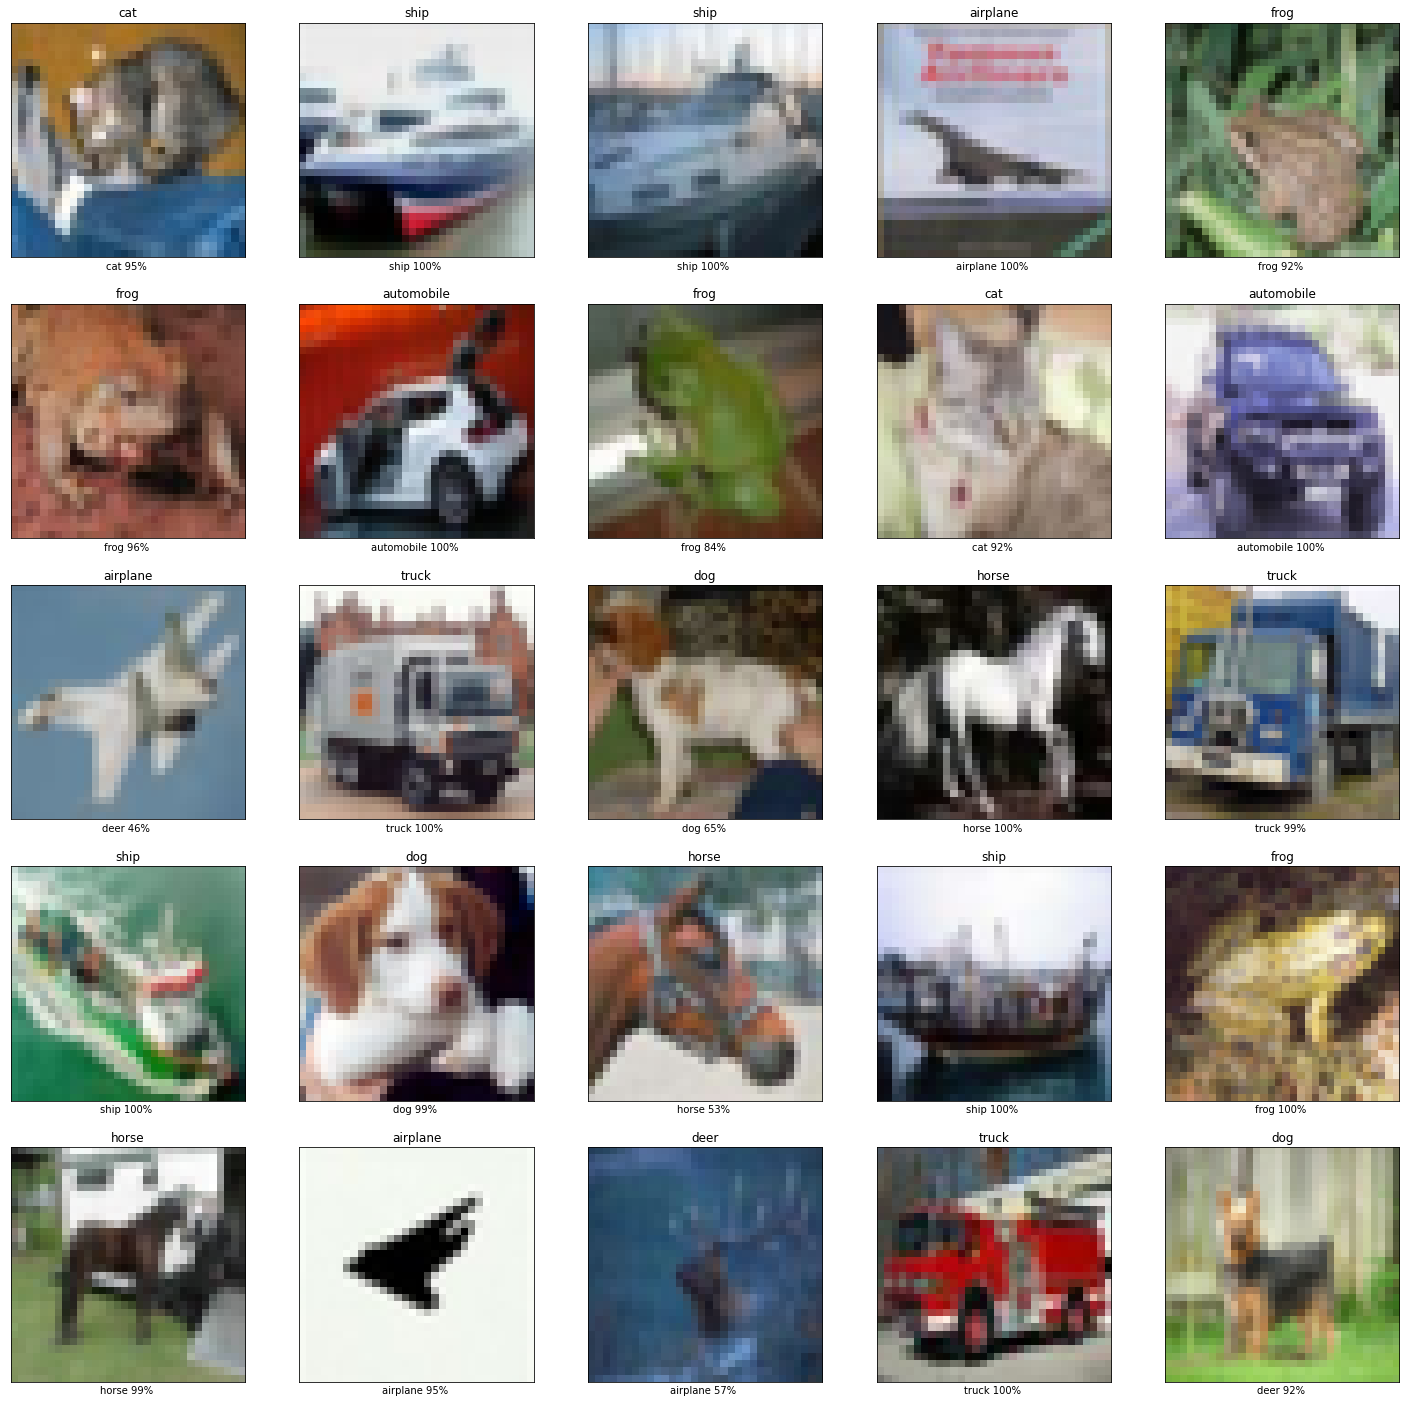

In [21]:
plt.figure(figsize=(25,25));

for i in range(25):
    plt.subplot(5,5,i+1);
    plt.xticks([]);
    plt.yticks([]);
    plt.imshow(test_images[i]);
    plt.xlabel("{} {:2.0f}% ".format(class_label[np.argmax(predictions[i])], 100*np.max(predictions[i])));
    plt.title(class_label[int(test_labels[i])]);
plt.show();